In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dados:
EURUSD: 03/01/2000 - 14/09/2018


### Indicadores

Momentum:
RSI
SO

Volatility:
ATR

Trend:
EMA

### Candlestick

High

Low

Open

Close

T1D - Trend 1 day




In [52]:
toFloat = lambda x: float(x.replace(',', '.')) if x!='missing' else -1

In [53]:
df = pd.read_csv('EUR_USD Dados Históricos.csv', converters={'Último': toFloat, 'Abertura': toFloat, 'Máxima': toFloat, 'Mínima': toFloat})

In [54]:
# Reversing the order
df = df.loc[::-1].reset_index(drop=True)

In [55]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Var%
0,08.12.1999,1.0273,1.0254,1.0290,1.0222,"0,19%"
1,09.12.1999,1.0208,1.0280,1.0286,1.0152,"-0,63%"
2,10.12.1999,1.0129,1.0213,1.0227,1.0112,"-0,77%"
3,13.12.1999,1.0139,1.0137,1.0164,1.0105,"0,10%"
4,14.12.1999,1.0059,1.0143,1.0150,1.0025,"-0,79%"


In [56]:
data = df[18:]

In [57]:
data.head()

,Data,Último,Abertura,Máxima,Mínima,Var%
18,03.01.2000,1.0265,1.0052,1.0282,1.0050,"1,89%"
19,04.01.2000,1.0312,1.0244,1.0347,1.0213,"0,46%"
20,05.01.2000,1.0316,1.0295,1.0404,1.0282,"0,04%"
21,06.01.2000,1.0324,1.0325,1.0419,1.0275,"0,08%"
22,07.01.2000,1.0292,1.0327,1.0333,1.0252,"-0,31%"


In [58]:
n_days = len(data.index)
print(n_days)

4880


In [59]:
data.head()

,Data,Último,Abertura,Máxima,Mínima,Var%
18,03.01.2000,1.0265,1.0052,1.0282,1.0050,"1,89%"
19,04.01.2000,1.0312,1.0244,1.0347,1.0213,"0,46%"
20,05.01.2000,1.0316,1.0295,1.0404,1.0282,"0,04%"
21,06.01.2000,1.0324,1.0325,1.0419,1.0275,"0,08%"
22,07.01.2000,1.0292,1.0327,1.0333,1.0252,"-0,31%"


In [60]:
# Extracting Open, Close, High and Low from data
Open = data['Abertura'].values
Close = data['Último'].values
High = data['Máxima'].values
Low = data['Mínima'].values


In [61]:
# Getting T1D from df
T1D = []

for i in range(n_days):
    if df['Último'].values[i+18] - df['Último'].values[i+17] > 0:
        T1D.append(1)
    else:
        T1D.append(-1)
T1D = np.array(T1D)


In [62]:
days = np.arange(1,n_days+1,1)
len(days)

4880

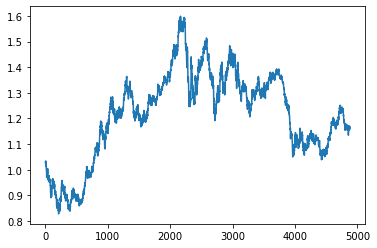

In [63]:
plt.plot(days, Close)

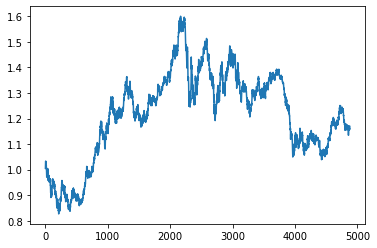

In [64]:
plt.plot(days, Open)

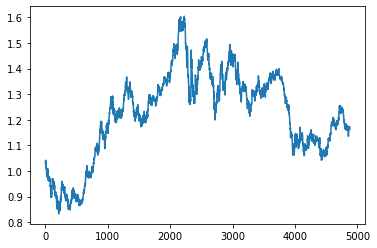

In [65]:
plt.plot(days, High)

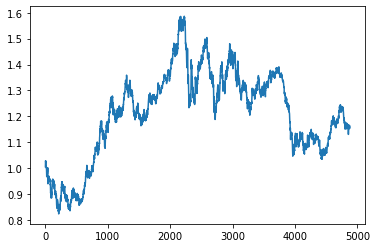

In [66]:
plt.plot(days, Low)

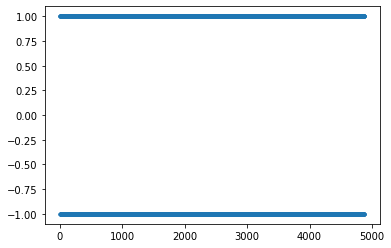

In [67]:
plt.plot(days, T1D,'.')

Parameters: 3, 5, 8, 12, 18 days

In [68]:
params = [3,5,8,12,18]

In [69]:
def calculate_RSI(time_series, last_n_days):
    RSI = []
    for day in range(4880):
        gains = []
        losses = []
        for days_before in range(last_n_days+1):
            price_change = time_series[18+day-days_before]-time_series[17+day-days_before]
            if price_change > 0:
                gains.append(price_change)
                losses.append(0)
            elif price_change < 0:
                gains.append(0)
                losses.append(-price_change)
            else:
                gains.append(0)
                losses.append(0)
        avg_gain = sum(gains)/last_n_days
        avg_loss = sum(losses)/last_n_days
        if avg_loss == 0:
            RS = 0
        else:
            RS = avg_gain/avg_loss
        RSI.append(100 - (100/(1+RS)))
        
    return RSI

In [70]:
RSI = []
for p in params:
    RSI.append(calculate_RSI(df['Último'].values, p))


In [71]:
RSI[0][-1]

61.538461538461654

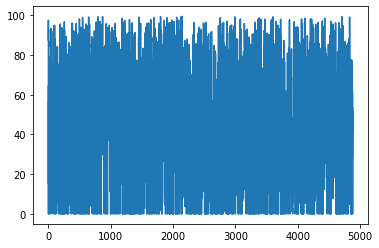

In [72]:
plt.plot(days, RSI[0])

In [73]:
def calculate_SO(dataframe, last_n_days):
    SO = []
    for day in range(4880):
        C = dataframe['Último'].values[18+day]
        H = np.amax(dataframe['Máxima'].values[18+day-last_n_days:18+day+1])
        L = np.amin(dataframe['Mínima'].values[18+day-last_n_days:18+day+1])
    
        SO.append(((C-L)/(H-L)) * 100)
    
    return SO            

In [74]:
SO = []
for p in params:
    SO.append(calculate_SO(df, p))

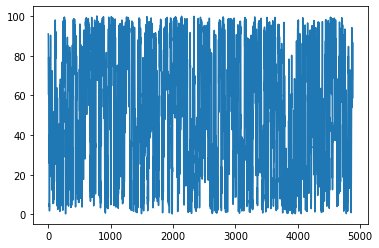

In [75]:
plt.plot(days, SO[4])

In [76]:
def calculate_ATR(dataframe, last_n_days):
    ATR = []
    for day in range(4880):
        TR = []
        for days_before in range(last_n_days):
            H = dataframe['Máxima'].values[18+day-days_before]
            L = dataframe['Mínima'].values[18+day-days_before]
            Cp = dataframe['Último'].values[17+day-days_before]
            TR.append(max([H-L, abs(H-Cp), abs(L-Cp)]))
        ATR.append(np.mean(TR))
    return ATR

In [77]:
ATR = []
for p in params:
    ATR.append(calculate_ATR(df, p))

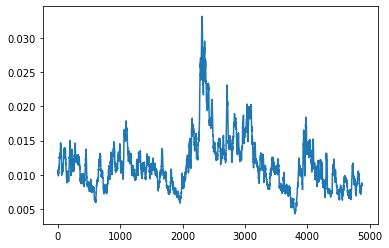

In [78]:
plt.plot(days, ATR[4])

In [79]:
def calculate_EMA(dataframe, last_n_days):
    k = 2/(last_n_days + 1)
    EMA = [np.mean(dataframe['Último'].values[18-last_n_days:18+1])]
    for day in range(1,4880):
        price_today = dataframe['Último'].values[18+day]
        EMA.append(k*price_today + (1-k)*EMA[day-1])
    
    return EMA 

In [80]:
EMA = []
for p in params:
    EMA.append(calculate_EMA(df, p))

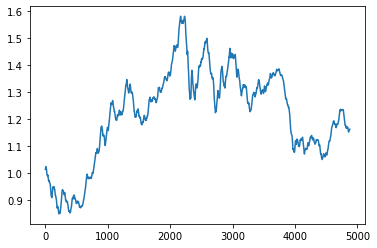

In [81]:
plt.plot(days, EMA[4])

In [82]:
def value_to_gray(time_series):
    gray_time_series = []
    Max = np.amax(time_series)
    Min = np.amin(time_series)
    for value in time_series:
        gray = ((value - Min)/(Max-Min)) * (255-0) + 0
        gray_time_series.append(gray)
    
    return gray_time_series

In [83]:
gray_Close = value_to_gray(Close)
gray_Open = value_to_gray(Open)
gray_High = value_to_gray(High)
gray_Low = value_to_gray(Low)
gray_T1D = value_to_gray(T1D)

gray_RSI = []
gray_SO = []
gray_ATR = []
gray_EMA = []

for i in range(5):
    gray_RSI.append(value_to_gray(RSI[i]))
    gray_SO.append(value_to_gray(SO[i]))
    gray_ATR.append(value_to_gray(ATR[i]))
    gray_EMA.append(value_to_gray(EMA[i]))

In [84]:
Images = []
for day in range(4880):
    image = []
    for i in range(5):
        row1 = []
        row2 = []
        row3 = []
        row4 = []
        for j in range(5):
            row1.append(gray_RSI[j][day])
            row2.append(gray_SO[j][day])
            row3.append(gray_ATR[j][day])
            row4.append(gray_EMA[j][day])
    image.append(row1)
    image.append(row2)
    image.append(row3)
    image.append(row4)
    image.append([gray_Open[day], gray_High[day], gray_Low[day], gray_Close[day], gray_T1D[day]])
    Images.append(image)

In [85]:
Images = np.array(Images)/255

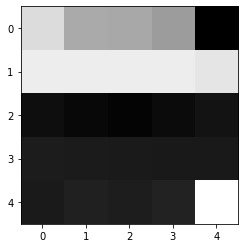

In [86]:
plt.imshow(np.array(Images[0]), cmap = 'gray')

In [87]:
labels = []
for day in range(4880-1):
    if Close[day+1] - Close[day] > 0:
        labels.append(1)
    else:
        labels.append(0)

In [88]:
labels = np.array(labels)
len(labels)

4879

In [89]:
labels[100:150]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1])

In [90]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [91]:
train_images = Images[0:4000]
train_labels = labels[0:4000]
validation_images = Images[4000:4879]
validation_labels = labels[4000:4879]

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(16, (2, 2), padding='same', strides=1, activation='relu', input_shape=(5, 5, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 5, 5, 16)          80        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 32)          4640      
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                6450      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                      

In [116]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [117]:
history = model.fit(train_images, train_labels, epochs=1000, validation_data=(validation_images, validation_labels))

Epoch 1/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.4978 - val_loss: 0.6927 - val_accuracy: 0.5245
Epoch 2/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6925 - val_accuracy: 0.5131
Epoch 3/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5080 - val_loss: 0.6922 - val_accuracy: 0.5199
Epoch 4/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5182 - val_loss: 0.6922 - val_accuracy: 0.5301
Epoch 5/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5240 - val_loss: 0.6919 - val_accuracy: 0.5154
Epoch 6/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5205 - val_loss: 0.6918 - val_accuracy: 0.5097
Epoch 7/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5257 - val_loss: 0.6920 - val_accuracy:

125/125 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.5925 - val_loss: 0.7006 - val_accuracy: 0.4994
Epoch 58/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.5893 - val_loss: 0.7041 - val_accuracy: 0.4915
Epoch 59/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.5985 - val_loss: 0.7103 - val_accuracy: 0.4903
Epoch 60/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6070 - val_loss: 0.7249 - val_accuracy: 0.4892
Epoch 61/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.5978 - val_loss: 0.7220 - val_accuracy: 0.4937
Epoch 62/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6130 - val_loss: 0.7309 - val_accuracy: 0.5119
Epoch 63/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6140 - val_loss: 0.7202 - val_accuracy: 0.4949

125/125 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.7178 - val_loss: 1.0623 - val_accuracy: 0.4915
Epoch 114/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.5130 - accuracy: 0.7188 - val_loss: 1.1290 - val_accuracy: 0.5085
Epoch 115/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7265 - val_loss: 1.0468 - val_accuracy: 0.5040
Epoch 116/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7235 - val_loss: 1.0964 - val_accuracy: 0.4903
Epoch 117/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.5100 - accuracy: 0.7185 - val_loss: 1.1147 - val_accuracy: 0.5142
Epoch 118/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7225 - val_loss: 1.2061 - val_accuracy: 0.4903
Epoch 119/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7360 - val_loss: 1.1263 - val_accuracy: 

125/125 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.7985 - val_loss: 2.0067 - val_accuracy: 0.4915
Epoch 170/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8043 - val_loss: 1.9312 - val_accuracy: 0.4881
Epoch 171/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8158 - val_loss: 1.9815 - val_accuracy: 0.4972
Epoch 172/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8158 - val_loss: 1.9652 - val_accuracy: 0.4949
Epoch 173/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8048 - val_loss: 2.1554 - val_accuracy: 0.5085
Epoch 174/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.7865 - val_loss: 2.2311 - val_accuracy: 0.4915
Epoch 175/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.7905 - val_loss: 1.9311 - val_accuracy: 

125/125 [==============================] - 0s 4ms/step - loss: 0.2869 - accuracy: 0.8570 - val_loss: 2.9380 - val_accuracy: 0.5051
Epoch 226/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8565 - val_loss: 2.7231 - val_accuracy: 0.5165
Epoch 227/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8593 - val_loss: 2.9839 - val_accuracy: 0.4983
Epoch 228/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8608 - val_loss: 2.9641 - val_accuracy: 0.4994
Epoch 229/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8658 - val_loss: 2.9063 - val_accuracy: 0.5074
Epoch 230/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8618 - val_loss: 2.8383 - val_accuracy: 0.5176
Epoch 231/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8593 - val_loss: 3.0151 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.8920 - val_loss: 3.5911 - val_accuracy: 0.5119
Epoch 282/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.8907 - val_loss: 3.8223 - val_accuracy: 0.5199
Epoch 283/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.8888 - val_loss: 3.6055 - val_accuracy: 0.5085
Epoch 284/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.8947 - val_loss: 3.5512 - val_accuracy: 0.5051
Epoch 285/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.2311 - accuracy: 0.8863 - val_loss: 3.6762 - val_accuracy: 0.5142
Epoch 286/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.8905 - val_loss: 3.7247 - val_accuracy: 0.5165
Epoch 287/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.8815 - val_loss: 3.8321 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9075 - val_loss: 4.4058 - val_accuracy: 0.5028
Epoch 338/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.8963 - val_loss: 4.6458 - val_accuracy: 0.4915
Epoch 339/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.8995 - val_loss: 4.3133 - val_accuracy: 0.5108
Epoch 340/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.8895 - val_loss: 4.4669 - val_accuracy: 0.5051
Epoch 341/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8758 - val_loss: 4.3792 - val_accuracy: 0.5108
Epoch 342/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8827 - val_loss: 4.4936 - val_accuracy: 0.5085
Epoch 343/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.8855 - val_loss: 4.5378 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9043 - val_loss: 4.8418 - val_accuracy: 0.5119
Epoch 394/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.2160 - accuracy: 0.9043 - val_loss: 5.1003 - val_accuracy: 0.5108
Epoch 395/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.1735 - accuracy: 0.9187 - val_loss: 4.9203 - val_accuracy: 0.5131
Epoch 396/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9208 - val_loss: 4.9112 - val_accuracy: 0.5210
Epoch 397/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9243 - val_loss: 5.0876 - val_accuracy: 0.5108
Epoch 398/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9237 - val_loss: 5.0643 - val_accuracy: 0.5176
Epoch 399/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9202 - val_loss: 5.0213 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9150 - val_loss: 5.2260 - val_accuracy: 0.5119
Epoch 450/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9340 - val_loss: 5.6490 - val_accuracy: 0.5256
Epoch 451/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.9243 - val_loss: 5.6336 - val_accuracy: 0.5290
Epoch 452/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.9295 - val_loss: 5.2274 - val_accuracy: 0.5006
Epoch 453/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.1623 - accuracy: 0.9230 - val_loss: 5.7853 - val_accuracy: 0.5165
Epoch 454/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.1834 - accuracy: 0.9115 - val_loss: 5.6312 - val_accuracy: 0.5165
Epoch 455/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.1734 - accuracy: 0.9183 - val_loss: 5.6666 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.9172 - val_loss: 5.3271 - val_accuracy: 0.4983
Epoch 506/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9265 - val_loss: 5.5143 - val_accuracy: 0.5199
Epoch 507/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 0.9390 - val_loss: 5.5468 - val_accuracy: 0.5267
Epoch 508/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9225 - val_loss: 5.6792 - val_accuracy: 0.5074
Epoch 509/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9352 - val_loss: 5.6206 - val_accuracy: 0.5085
Epoch 510/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9413 - val_loss: 5.7082 - val_accuracy: 0.5165
Epoch 511/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9415 - val_loss: 5.7556 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9170 - val_loss: 5.9419 - val_accuracy: 0.5028
Epoch 562/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9323 - val_loss: 6.0484 - val_accuracy: 0.5097
Epoch 563/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1274 - accuracy: 0.9352 - val_loss: 6.3146 - val_accuracy: 0.5097
Epoch 564/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9448 - val_loss: 6.1956 - val_accuracy: 0.5176
Epoch 565/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9362 - val_loss: 6.0591 - val_accuracy: 0.5085
Epoch 566/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9440 - val_loss: 6.1958 - val_accuracy: 0.5188
Epoch 567/1000
125/125 [==============================] - 1s 4ms/step - loss: 0.1105 - accuracy: 0.9460 - val_loss: 6.3944 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9333 - val_loss: 5.8951 - val_accuracy: 0.5165
Epoch 618/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.9473 - val_loss: 5.9229 - val_accuracy: 0.5142
Epoch 619/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9450 - val_loss: 5.9564 - val_accuracy: 0.5233
Epoch 620/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9463 - val_loss: 6.0399 - val_accuracy: 0.5176
Epoch 621/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9457 - val_loss: 5.9816 - val_accuracy: 0.5245
Epoch 622/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9540 - val_loss: 5.9675 - val_accuracy: 0.5313
Epoch 623/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9442 - val_loss: 5.9177 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9592 - val_loss: 6.2538 - val_accuracy: 0.5324
Epoch 674/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.9565 - val_loss: 6.2427 - val_accuracy: 0.5267
Epoch 675/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9592 - val_loss: 6.2012 - val_accuracy: 0.5176
Epoch 676/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9560 - val_loss: 6.3016 - val_accuracy: 0.5279
Epoch 677/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9460 - val_loss: 6.0783 - val_accuracy: 0.5324
Epoch 678/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9538 - val_loss: 6.2033 - val_accuracy: 0.5290
Epoch 679/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9475 - val_loss: 6.1583 - val_accuracy: 

125/125 [==============================] - 0s 4ms/step - loss: 0.1857 - accuracy: 0.9265 - val_loss: 6.2456 - val_accuracy: 0.5074
Epoch 730/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9255 - val_loss: 6.3453 - val_accuracy: 0.5142
Epoch 731/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.9420 - val_loss: 6.7132 - val_accuracy: 0.5233
Epoch 732/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9548 - val_loss: 6.1525 - val_accuracy: 0.5051
Epoch 733/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9565 - val_loss: 6.3570 - val_accuracy: 0.5131
Epoch 734/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9530 - val_loss: 6.5061 - val_accuracy: 0.5199
Epoch 735/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9607 - val_loss: 6.4044 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9448 - val_loss: 6.5554 - val_accuracy: 0.5404
Epoch 786/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.9417 - val_loss: 6.5751 - val_accuracy: 0.5301
Epoch 787/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1602 - accuracy: 0.9312 - val_loss: 6.3987 - val_accuracy: 0.5222
Epoch 788/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9222 - val_loss: 6.5314 - val_accuracy: 0.5154
Epoch 789/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9273 - val_loss: 6.7276 - val_accuracy: 0.5256
Epoch 790/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9600 - val_loss: 6.5780 - val_accuracy: 0.5176
Epoch 791/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9607 - val_loss: 6.7408 - val_accuracy: 

125/125 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9647 - val_loss: 6.5606 - val_accuracy: 0.5131
Epoch 842/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1596 - accuracy: 0.9360 - val_loss: 6.7578 - val_accuracy: 0.5233
Epoch 843/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9525 - val_loss: 6.8973 - val_accuracy: 0.5108
Epoch 844/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9622 - val_loss: 6.5518 - val_accuracy: 0.5154
Epoch 845/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9670 - val_loss: 6.9668 - val_accuracy: 0.5222
Epoch 846/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.1281 - accuracy: 0.9513 - val_loss: 7.2629 - val_accuracy: 0.5119
Epoch 847/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.3601 - accuracy: 0.8840 - val_loss: 6.3824 - val_accuracy: 

KeyboardInterrupt: 